In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns



In [20]:
#  Load the train and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display first few rows of the training dataset
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
#  Select relevant features and target from the train dataset
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Drop rows with missing values in the selected features from the training data
train_data_clean = train_data[features + [target]].dropna()

# Extract X (features) and y (target) from training data
X_train = train_data_clean[features]
y_train = train_data_clean[target]

# Display first few rows of the cleaned training data
X_train.head()


,GrLivArea,BedroomAbvGr,FullBath
0,1710,3,2
1,1262,3,2
2,1786,3,2
3,1717,3,1
4,2198,4,2


In [22]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the model coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Coefficients: [   110.06172639 -27859.33222353  29694.68839062]
Intercept: 47509.48218946543


In [23]:
#  Clean the test data by selecting relevant features
test_data_clean = test_data[features].dropna()

# Make predictions using the trained model
predictions = model.predict(test_data_clean)

# Display the first few predictions
predictions[:10]



array([120100.81297664, 139898.20827909, 202611.4145861 , 199859.8714264 ,
       192059.20430023, 205473.01947218, 153964.13152262, 184561.29145847,
       169078.28121928, 118559.9488072 ])

In [24]:
#  Split the original train data for evaluation (optional)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model on the training split
model_split = LinearRegression()
model_split.fit(X_train_split, y_train_split)

# Make predictions on the test split
y_pred_split = model_split.predict(X_test_split)

# Calculate and print the mean squared error (MSE)
mse = mean_squared_error(y_test_split, y_pred_split)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2806426667.247853


In [25]:
#  Prepare a DataFrame with predictions and save to a CSV file
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})

# Save the predictions to a CSV file
output.to_csv('house_price_predictions.csv', index=False)

# Display the first few rows of the output
output.head()


,Id,SalePrice
0,1461,120100.812977
1,1462,139898.208279
2,1463,202611.414586
3,1464,199859.871426
4,1465,192059.204300


In [26]:

# Set the style for seaborn plots
sns.set(style="whitegrid")

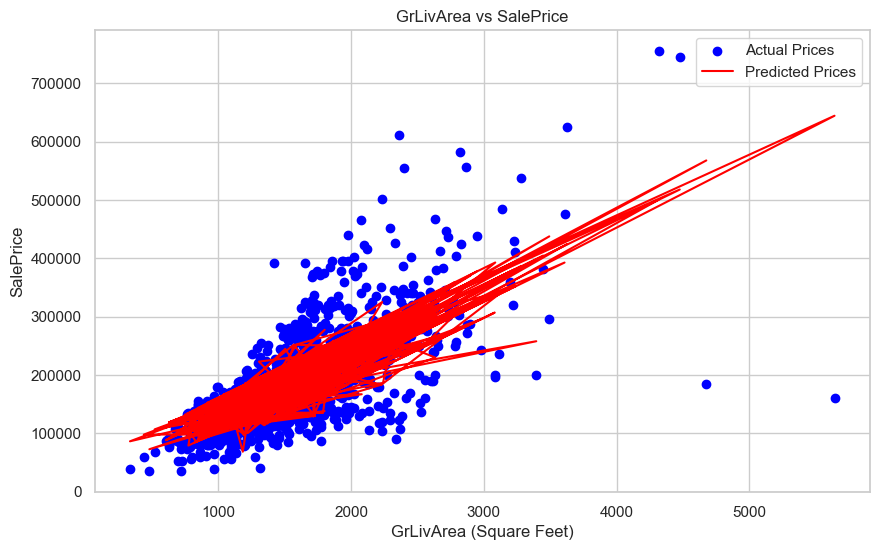

In [27]:
# Linear regression plot for GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))

# Plot actual data points
sns.scatterplot(x=X_train['GrLivArea'], y=y_train, color='blue', label='Actual Prices')

# Plot the regression line (Predicted values)
sns.lineplot(x=X_train['GrLivArea'], y=model.predict(X_train), color='red', label='Regression Line')

# Add labels and title
plt.title('Linear Regression: GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (Square Feet)')
plt.ylabel('SalePrice')

plt.legend()
plt.show()


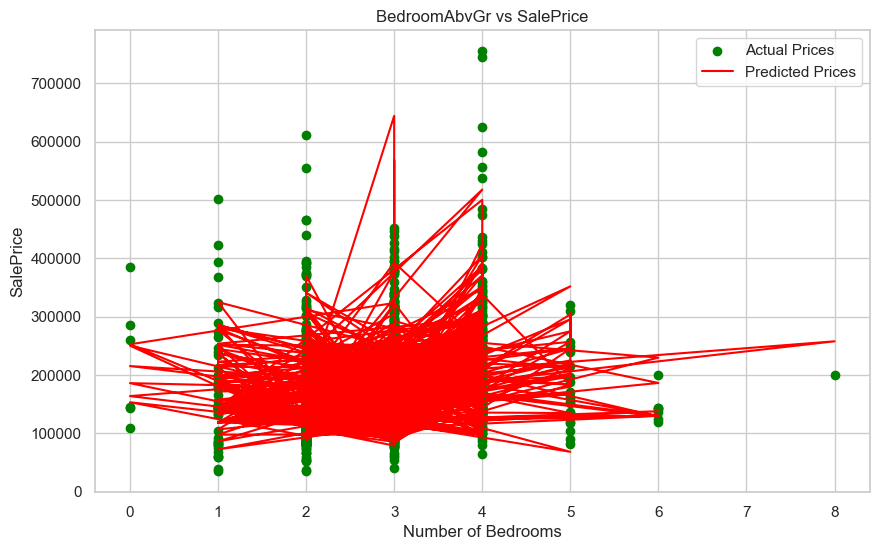

In [28]:
#  Plot Predicted vs Actual Prices
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted sale prices
plt.scatter(y_train, model.predict(X_train), color='green')
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

# Plot a diagonal line (perfect prediction line)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.show()


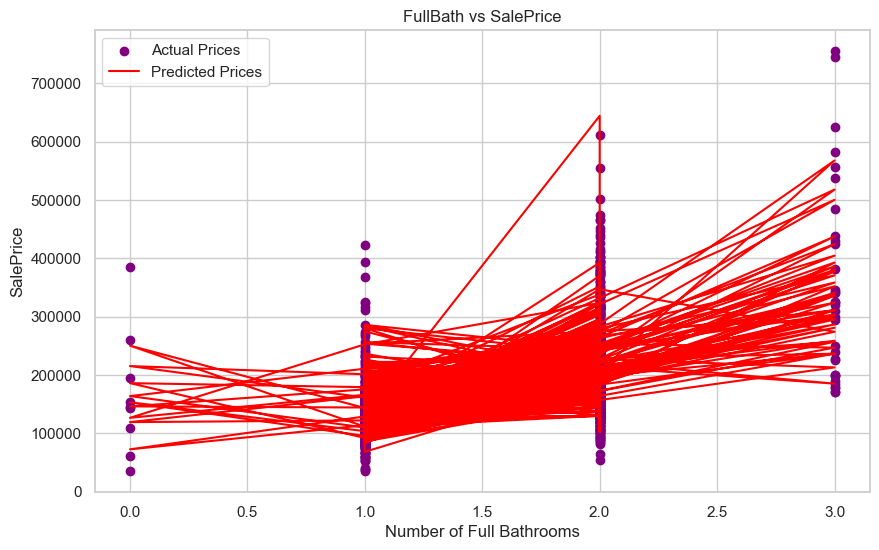

In [29]:
#  Scatter plot for FullBath vs SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(X_train['FullBath'], y_train, color='purple', label='Actual Prices')
plt.plot(X_train['FullBath'], model.predict(X_train), color='red', label='Predicted Prices')
plt.title('FullBath vs SalePrice')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('SalePrice')
plt.legend()
plt.show()


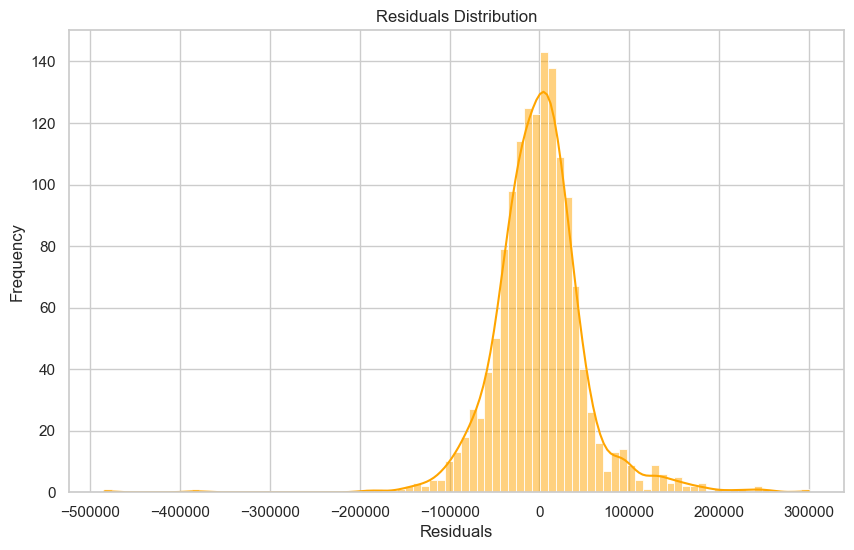

In [30]:
# Residual plot
plt.figure(figsize=(10, 6))
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
sns.histplot(residuals, kde=True, color='orange')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


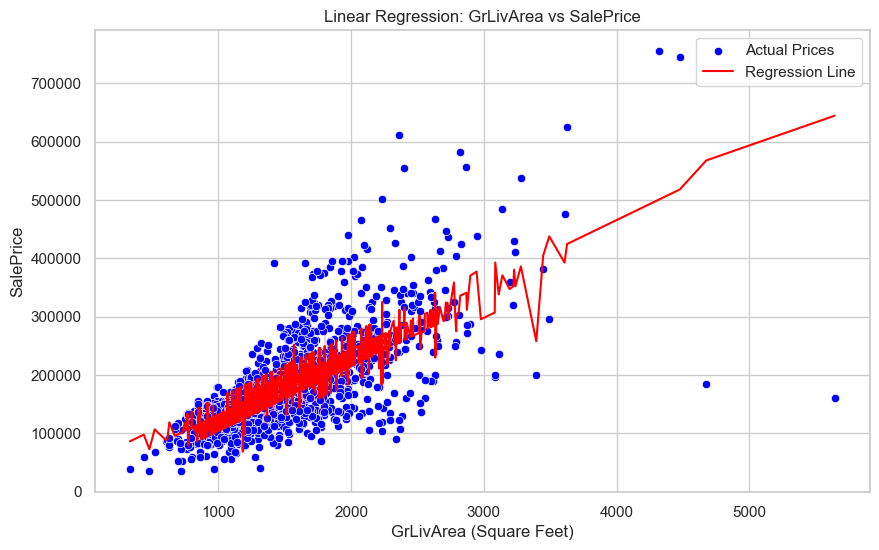

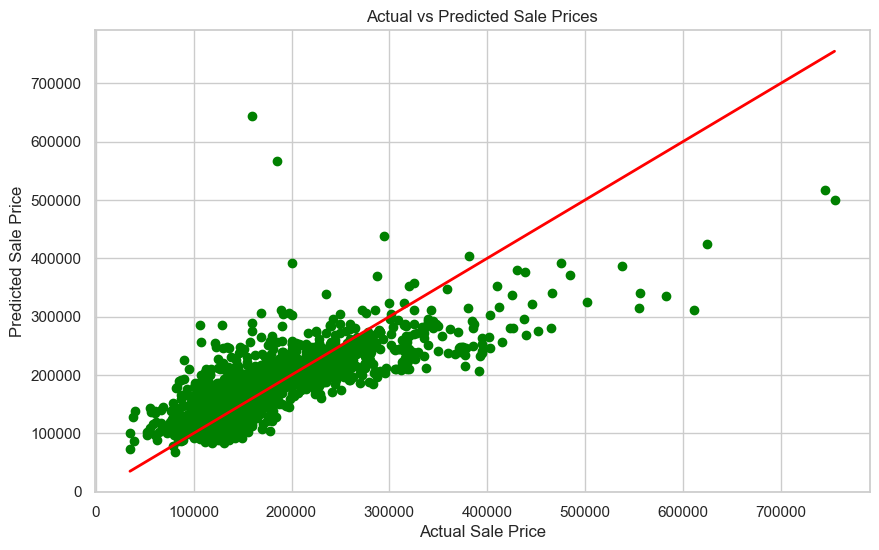